# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Steps Involved
-  Reading and understanding the data
-  Preparing data( train_test split, rescaling etc)
-  Training the model
-  Residual analysis
-  Prediction and evaluation on the test set

## Reading and Understanding the Data


## Import all libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Reading and Understanding dataset

In [2]:
#Read dataset
BikeSharing = pd.read_csv("day.csv")

In [3]:
#Print header
print(BikeSharing.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


### Shape

In [4]:
BikeSharing.shape

(730, 16)

In [5]:
BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
BikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### All columns in the file

In [7]:
columns = list(BikeSharing.columns)
columns

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

### DTypes

In [8]:
BikeSharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Data Cleaning
### Get null values

In [9]:
data_null = BikeSharing.isnull().sum() == 0
print(BikeSharing.isnull().sum())
#There are zero empty rows

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Check for duplicate rows in dataset based on id column

In [10]:
duplicate_day=BikeSharing[BikeSharing.duplicated(['instant'])]
duplicate_day.count()
#There are no duplicate rows

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Remove all columns that are completely empty.

In [11]:
# Find list of columns that have all empty values
BikeSharing.isnull().sum()
#No empty columns

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### converting to categorical string values: season, month, weathersit

In [12]:
BikeSharing['season']=BikeSharing.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
BikeSharing['mnth']=BikeSharing.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
BikeSharing['yr']=BikeSharing.yr.map({0:'2018', 1:'2019'})
BikeSharing['workingday']=BikeSharing.workingday.map({0:'Weekend/Holiday', 1:'Workingday'})
BikeSharing['weathersit']=BikeSharing.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
BikeSharing['weekday']=BikeSharing.weekday.map({0: 'Sunday', 1: 'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [13]:
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Saturday,Weekend/Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sunday,Weekend/Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Monday,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tuesday,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wednesday,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualization

### Visualising using pairplot

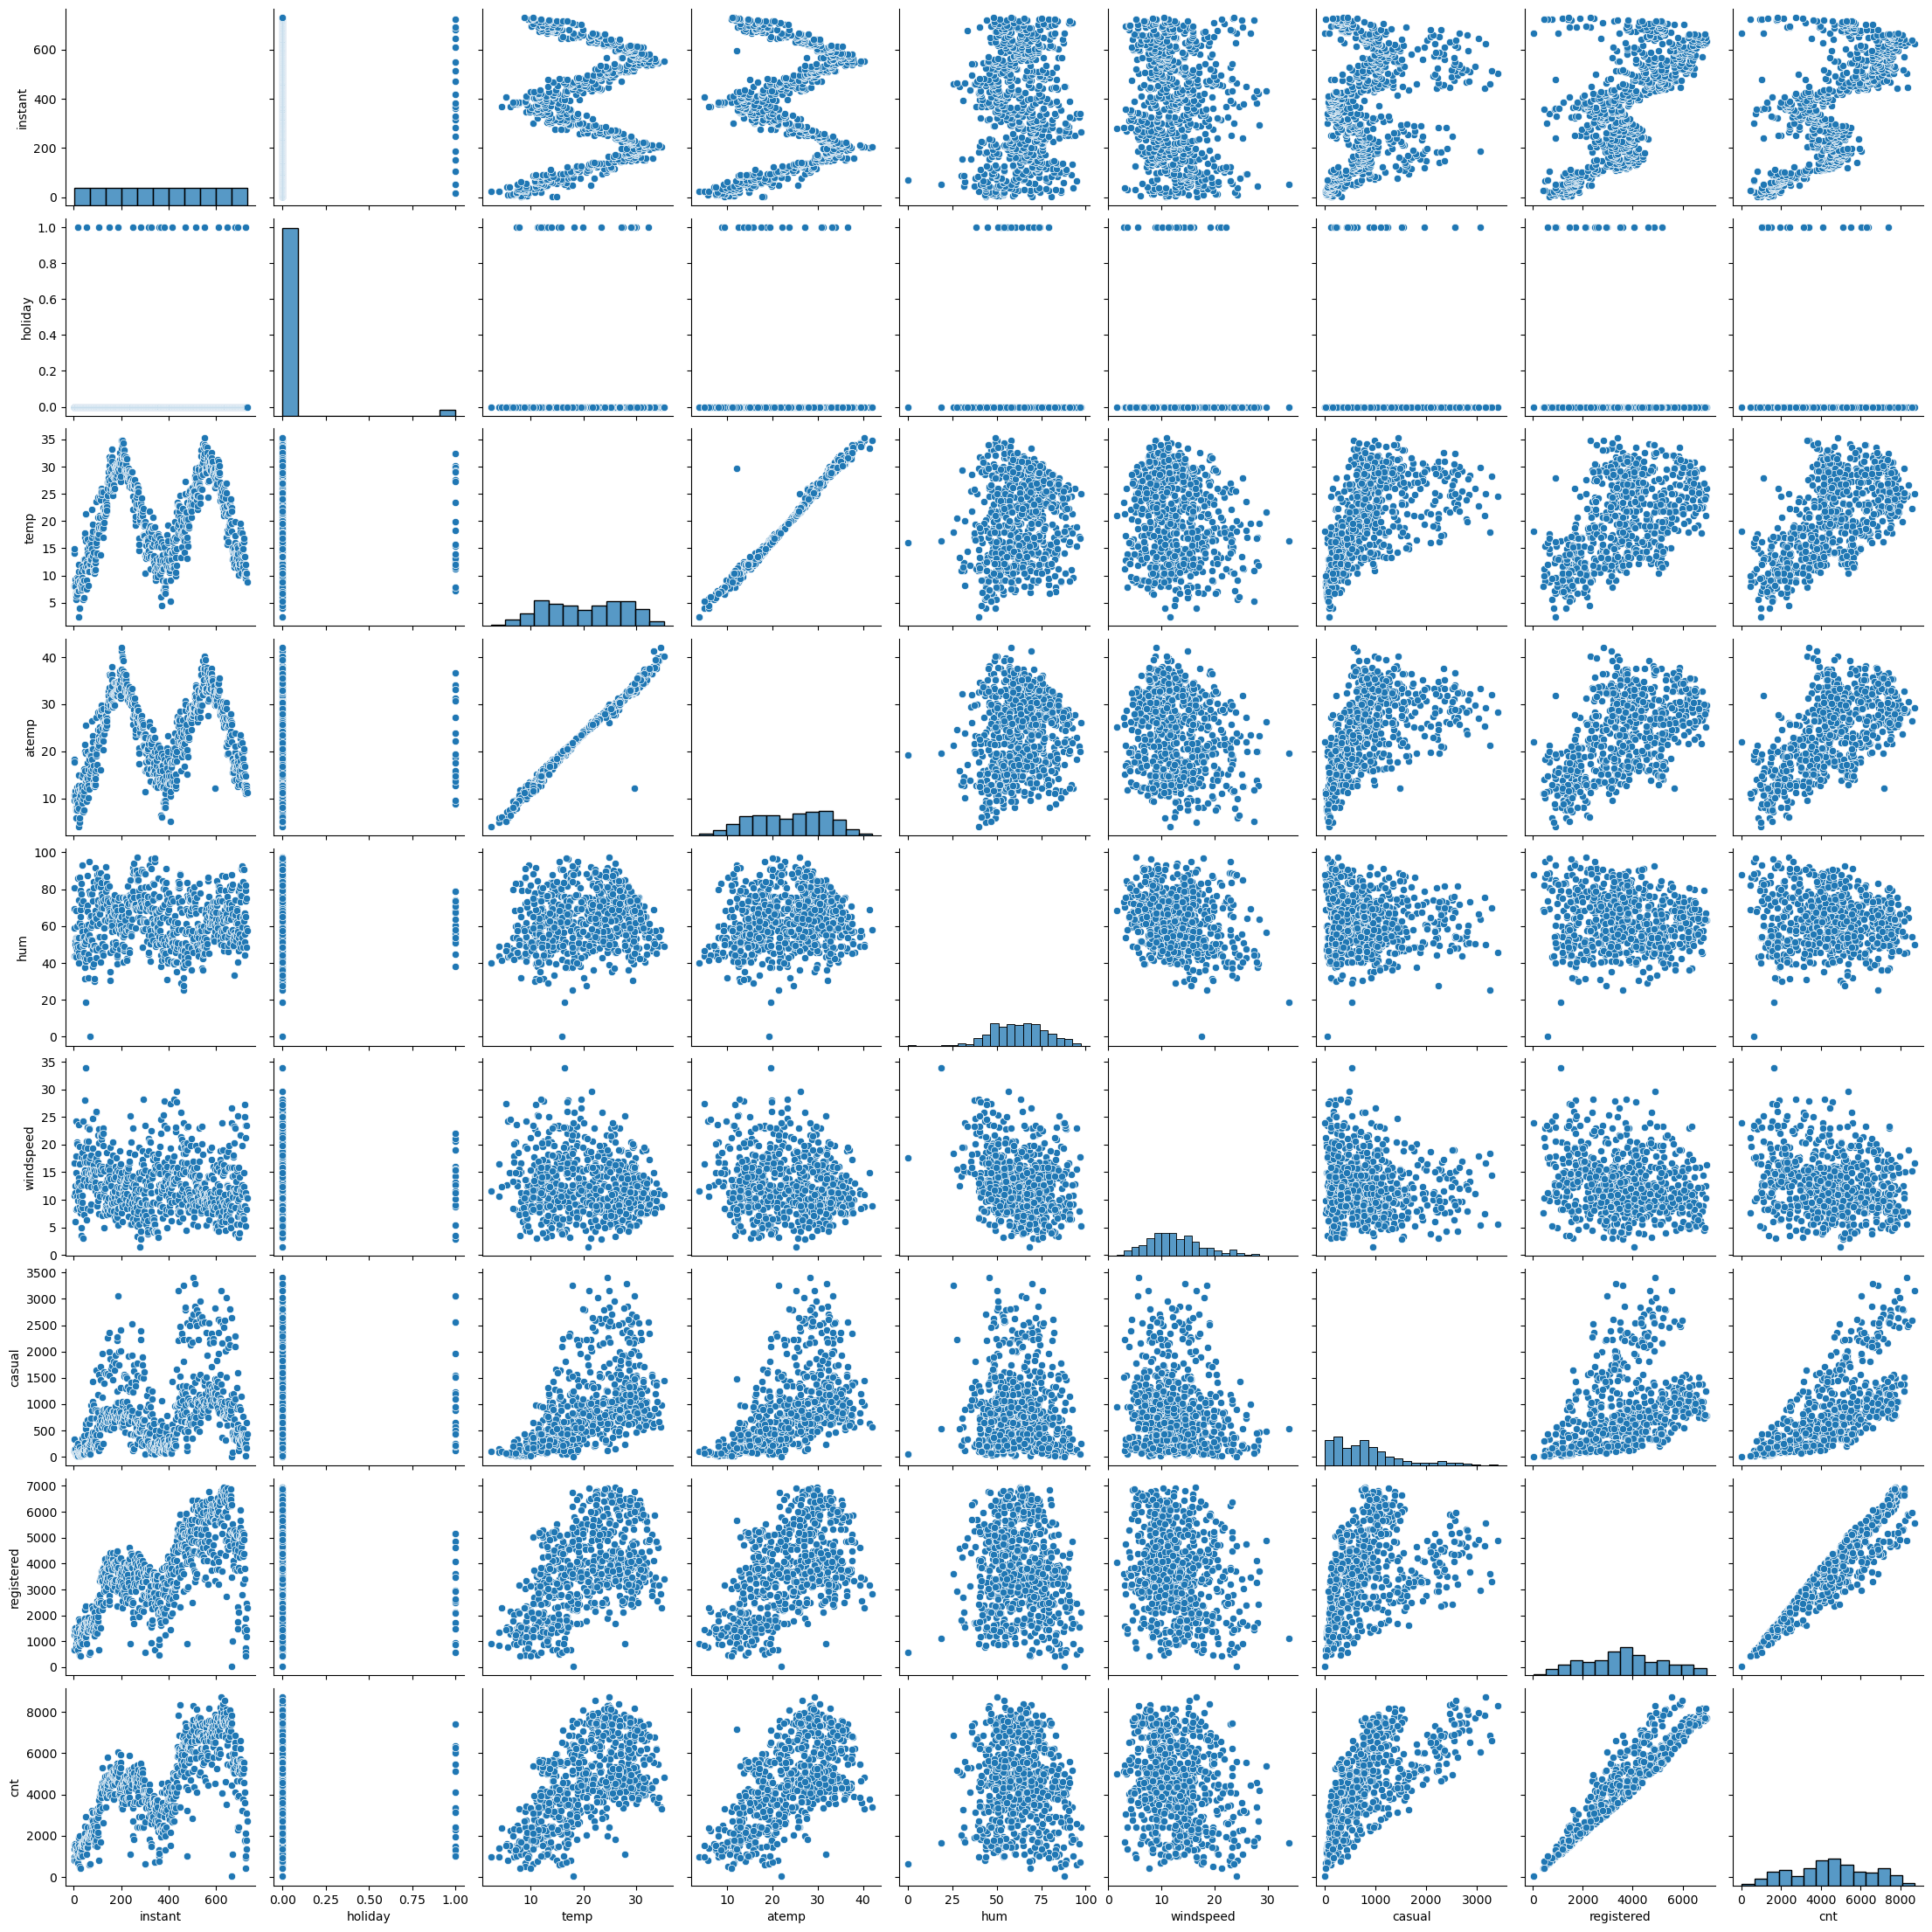

In [14]:
sns.pairplot(BikeSharing)

### Observation:
Here we can see the correlation between the numeric variables. Also note that temp has a positive correlation with count.

<Axes: xlabel='weathersit', ylabel='cnt'>

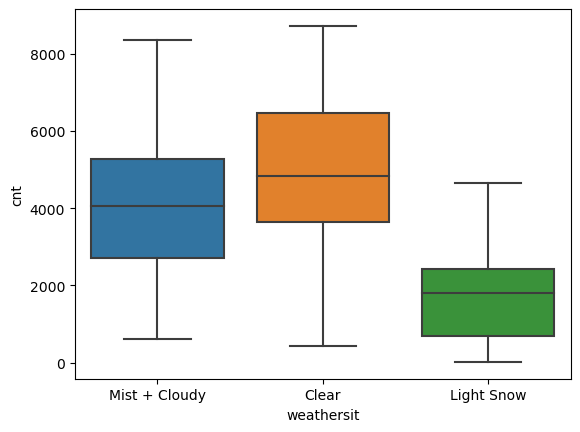

In [15]:
sns.boxplot( x='weathersit', y='cnt', data=BikeSharing)

### Observation
Count is more when the weather is Clear, Few clouds, Partly cloudy, Partly cloudy

<Axes: xlabel='mnth', ylabel='cnt'>

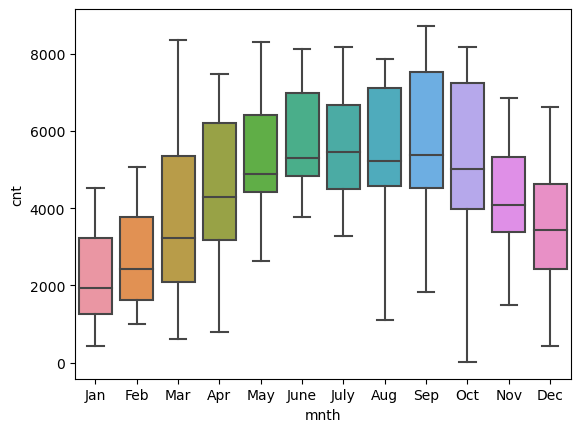

In [16]:
sns.boxplot( x='mnth', y='cnt', data=BikeSharing)

<Axes: xlabel='season', ylabel='cnt'>

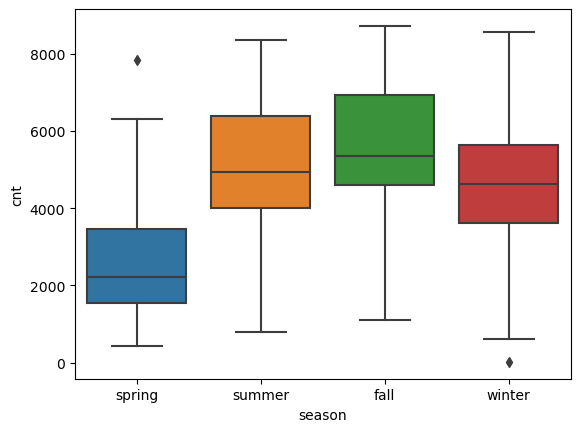

In [17]:
sns.boxplot( x='season', y='cnt', data=BikeSharing)

### Observation:
Count is high when season is fall

<Axes: xlabel='yr', ylabel='cnt'>

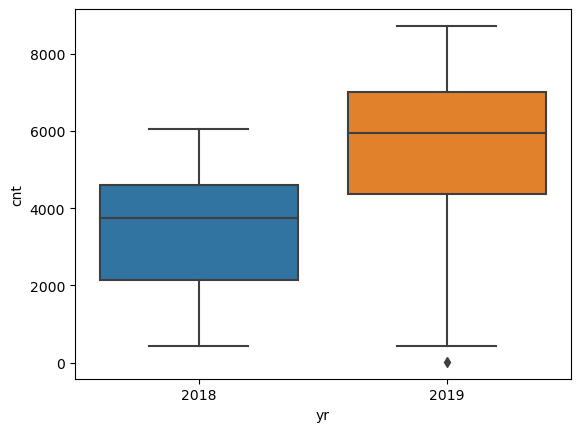

In [18]:
sns.boxplot( x='yr', y='cnt', data=BikeSharing)

### Observation:
Count was high in 2019.

<Axes: xlabel='holiday', ylabel='cnt'>

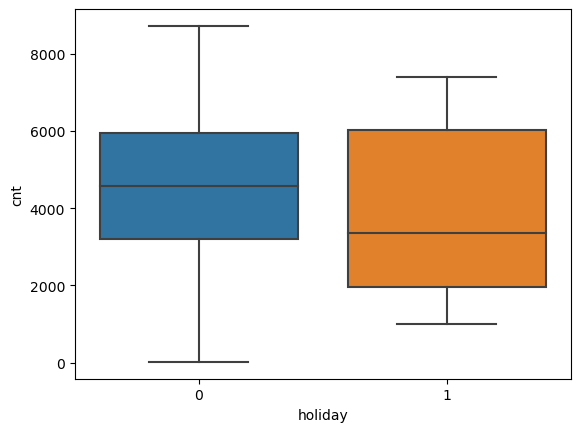

In [19]:
sns.boxplot( x='holiday', y='cnt', data=BikeSharing)

<Axes: xlabel='weekday', ylabel='cnt'>

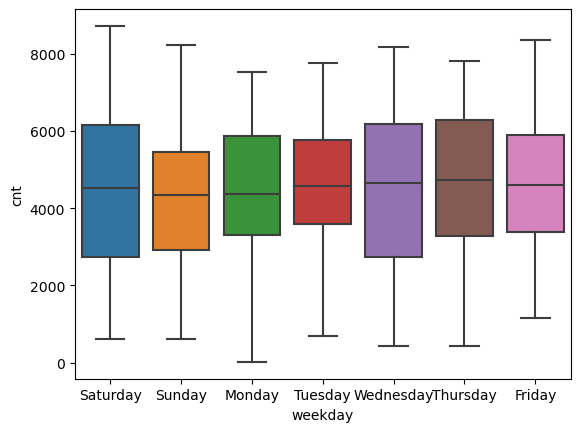

In [20]:
sns.boxplot( x='weekday', y='cnt', data=BikeSharing)

<Axes: xlabel='workingday', ylabel='cnt'>

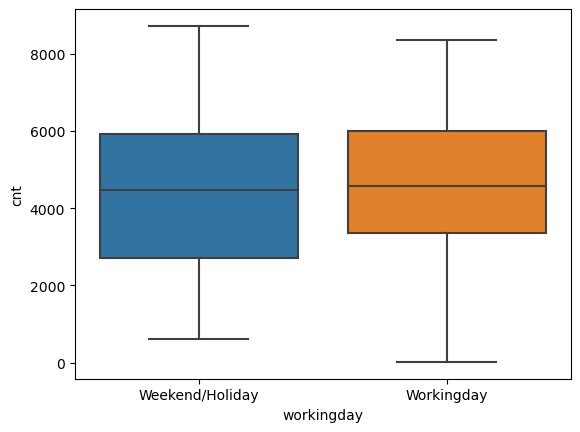

In [21]:
sns.boxplot( x='workingday', y='cnt', data=BikeSharing)

### Observation:
No significant difference 

## Preparing the data

### Dummy Variables for categorical variables

In [22]:
BikeSharing.weathersit.value_counts()
BikeSharing.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [23]:
#creating dummy variables for weathersit
weather = pd.get_dummies(BikeSharing['weathersit'], drop_first=True)
print(weather)

     Light Snow  Mist + Cloudy
0             0              1
1             0              1
2             0              0
3             0              0
4             0              0
..          ...            ...
725           0              1
726           0              1
727           0              1
728           0              0
729           0              1

[730 rows x 2 columns]


In [24]:
BikeSharing = pd.concat([BikeSharing, weather], axis=1)

In [25]:
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light Snow,Mist + Cloudy
0,1,01-01-2018,spring,2018,Jan,0,Saturday,Weekend/Holiday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,2,02-01-2018,spring,2018,Jan,0,Sunday,Weekend/Holiday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,3,03-01-2018,spring,2018,Jan,0,Monday,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,spring,2018,Jan,0,Tuesday,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,spring,2018,Jan,0,Wednesday,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [26]:
#Dummy variables for season
seasondummy = pd.get_dummies(BikeSharing['season'], drop_first=True)
print(seasondummy)

     spring  summer  winter
0         1       0       0
1         1       0       0
2         1       0       0
3         1       0       0
4         1       0       0
..      ...     ...     ...
725       1       0       0
726       1       0       0
727       1       0       0
728       1       0       0
729       1       0       0

[730 rows x 3 columns]


In [27]:
BikeSharing = pd.concat([BikeSharing, seasondummy], axis=1)
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,Light Snow,Mist + Cloudy,spring,summer,winter
0,1,01-01-2018,spring,2018,Jan,0,Saturday,Weekend/Holiday,Mist + Cloudy,14.110847,...,80.5833,10.749882,331,654,985,0,1,1,0,0
1,2,02-01-2018,spring,2018,Jan,0,Sunday,Weekend/Holiday,Mist + Cloudy,14.902598,...,69.6087,16.652113,131,670,801,0,1,1,0,0
2,3,03-01-2018,spring,2018,Jan,0,Monday,Workingday,Clear,8.050924,...,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,4,04-01-2018,spring,2018,Jan,0,Tuesday,Workingday,Clear,8.200000,...,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,5,05-01-2018,spring,2018,Jan,0,Wednesday,Workingday,Clear,9.305237,...,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [28]:
#Dropping variables for which we created dummy variables
#Dropping variables that are not required
BikeSharing = BikeSharing.drop('weathersit', axis=1)
BikeSharing = BikeSharing.drop('season', axis=1)
BikeSharing = BikeSharing.drop('casual', axis=1)
BikeSharing = BikeSharing.drop('registered', axis=1)

In [29]:
#Dummy variable for Month
BikeSharing.mnth.value_counts()
month = pd.get_dummies(BikeSharing['mnth'],drop_first=True)
month.head()
BikeSharing = pd.concat([BikeSharing,month], axis=1)
BikeSharing = BikeSharing.drop('mnth', axis=1)
BikeSharing.head()
print(month)

     Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep
0      0    0    0    1     0     0    0    0    0    0    0
1      0    0    0    1     0     0    0    0    0    0    0
2      0    0    0    1     0     0    0    0    0    0    0
3      0    0    0    1     0     0    0    0    0    0    0
4      0    0    0    1     0     0    0    0    0    0    0
..   ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...
725    0    1    0    0     0     0    0    0    0    0    0
726    0    1    0    0     0     0    0    0    0    0    0
727    0    1    0    0     0     0    0    0    0    0    0
728    0    1    0    0     0     0    0    0    0    0    0
729    0    1    0    0     0     0    0    0    0    0    0

[730 rows x 11 columns]


In [30]:
#Dummy variable for weekday
BikeSharing.weekday.value_counts()
weekdaydummy = pd.get_dummies(BikeSharing['weekday'],drop_first=True)
BikeSharing = pd.concat([BikeSharing,weekdaydummy], axis=1)
BikeSharing = BikeSharing.drop('weekday', axis=1)
BikeSharing.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,01-01-2018,2018,0,Weekend/Holiday,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,2018,0,Weekend/Holiday,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,2018,0,Workingday,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,2018,0,Workingday,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,2018,0,Workingday,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,1


In [31]:
month.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [32]:
weekdaydummy.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [33]:
BikeSharing = BikeSharing.drop('instant',axis=1)

In [34]:
print(BikeSharing.columns)

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')


In [35]:
BikeSharing['workingday']=BikeSharing.workingday.map({'Weekend/Holiday':0, 'Workingday':1})
BikeSharing['yr']=BikeSharing.yr.map({'2018':0, '2019':1})


In [36]:
BikeSharing.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,1,0,0,0,0
1,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,1,0,0,0
2,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,1,0
4,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
BikeSharing = BikeSharing.drop('dteday',axis=1)

In [38]:
BikeSharing.nunique().sort_values()

yr                 2
Thursday           2
Sunday             2
Saturday           2
Monday             2
Sep                2
Oct                2
Nov                2
May                2
Mar                2
June               2
July               2
Jan                2
Feb                2
Dec                2
Aug                2
winter             2
summer             2
spring             2
Mist + Cloudy      2
Light Snow         2
workingday         2
holiday            2
Tuesday            2
Wednesday          2
temp             498
hum              594
windspeed        649
atemp            689
cnt              695
dtype: int64

### Splitting to train and test

In [39]:
df_train, df_test = train_test_split(BikeSharing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Rescaling

In [40]:
#Instantiate Object
scaler = MinMaxScaler()

numeric_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#Fit on data
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow,Mist + Cloudy,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


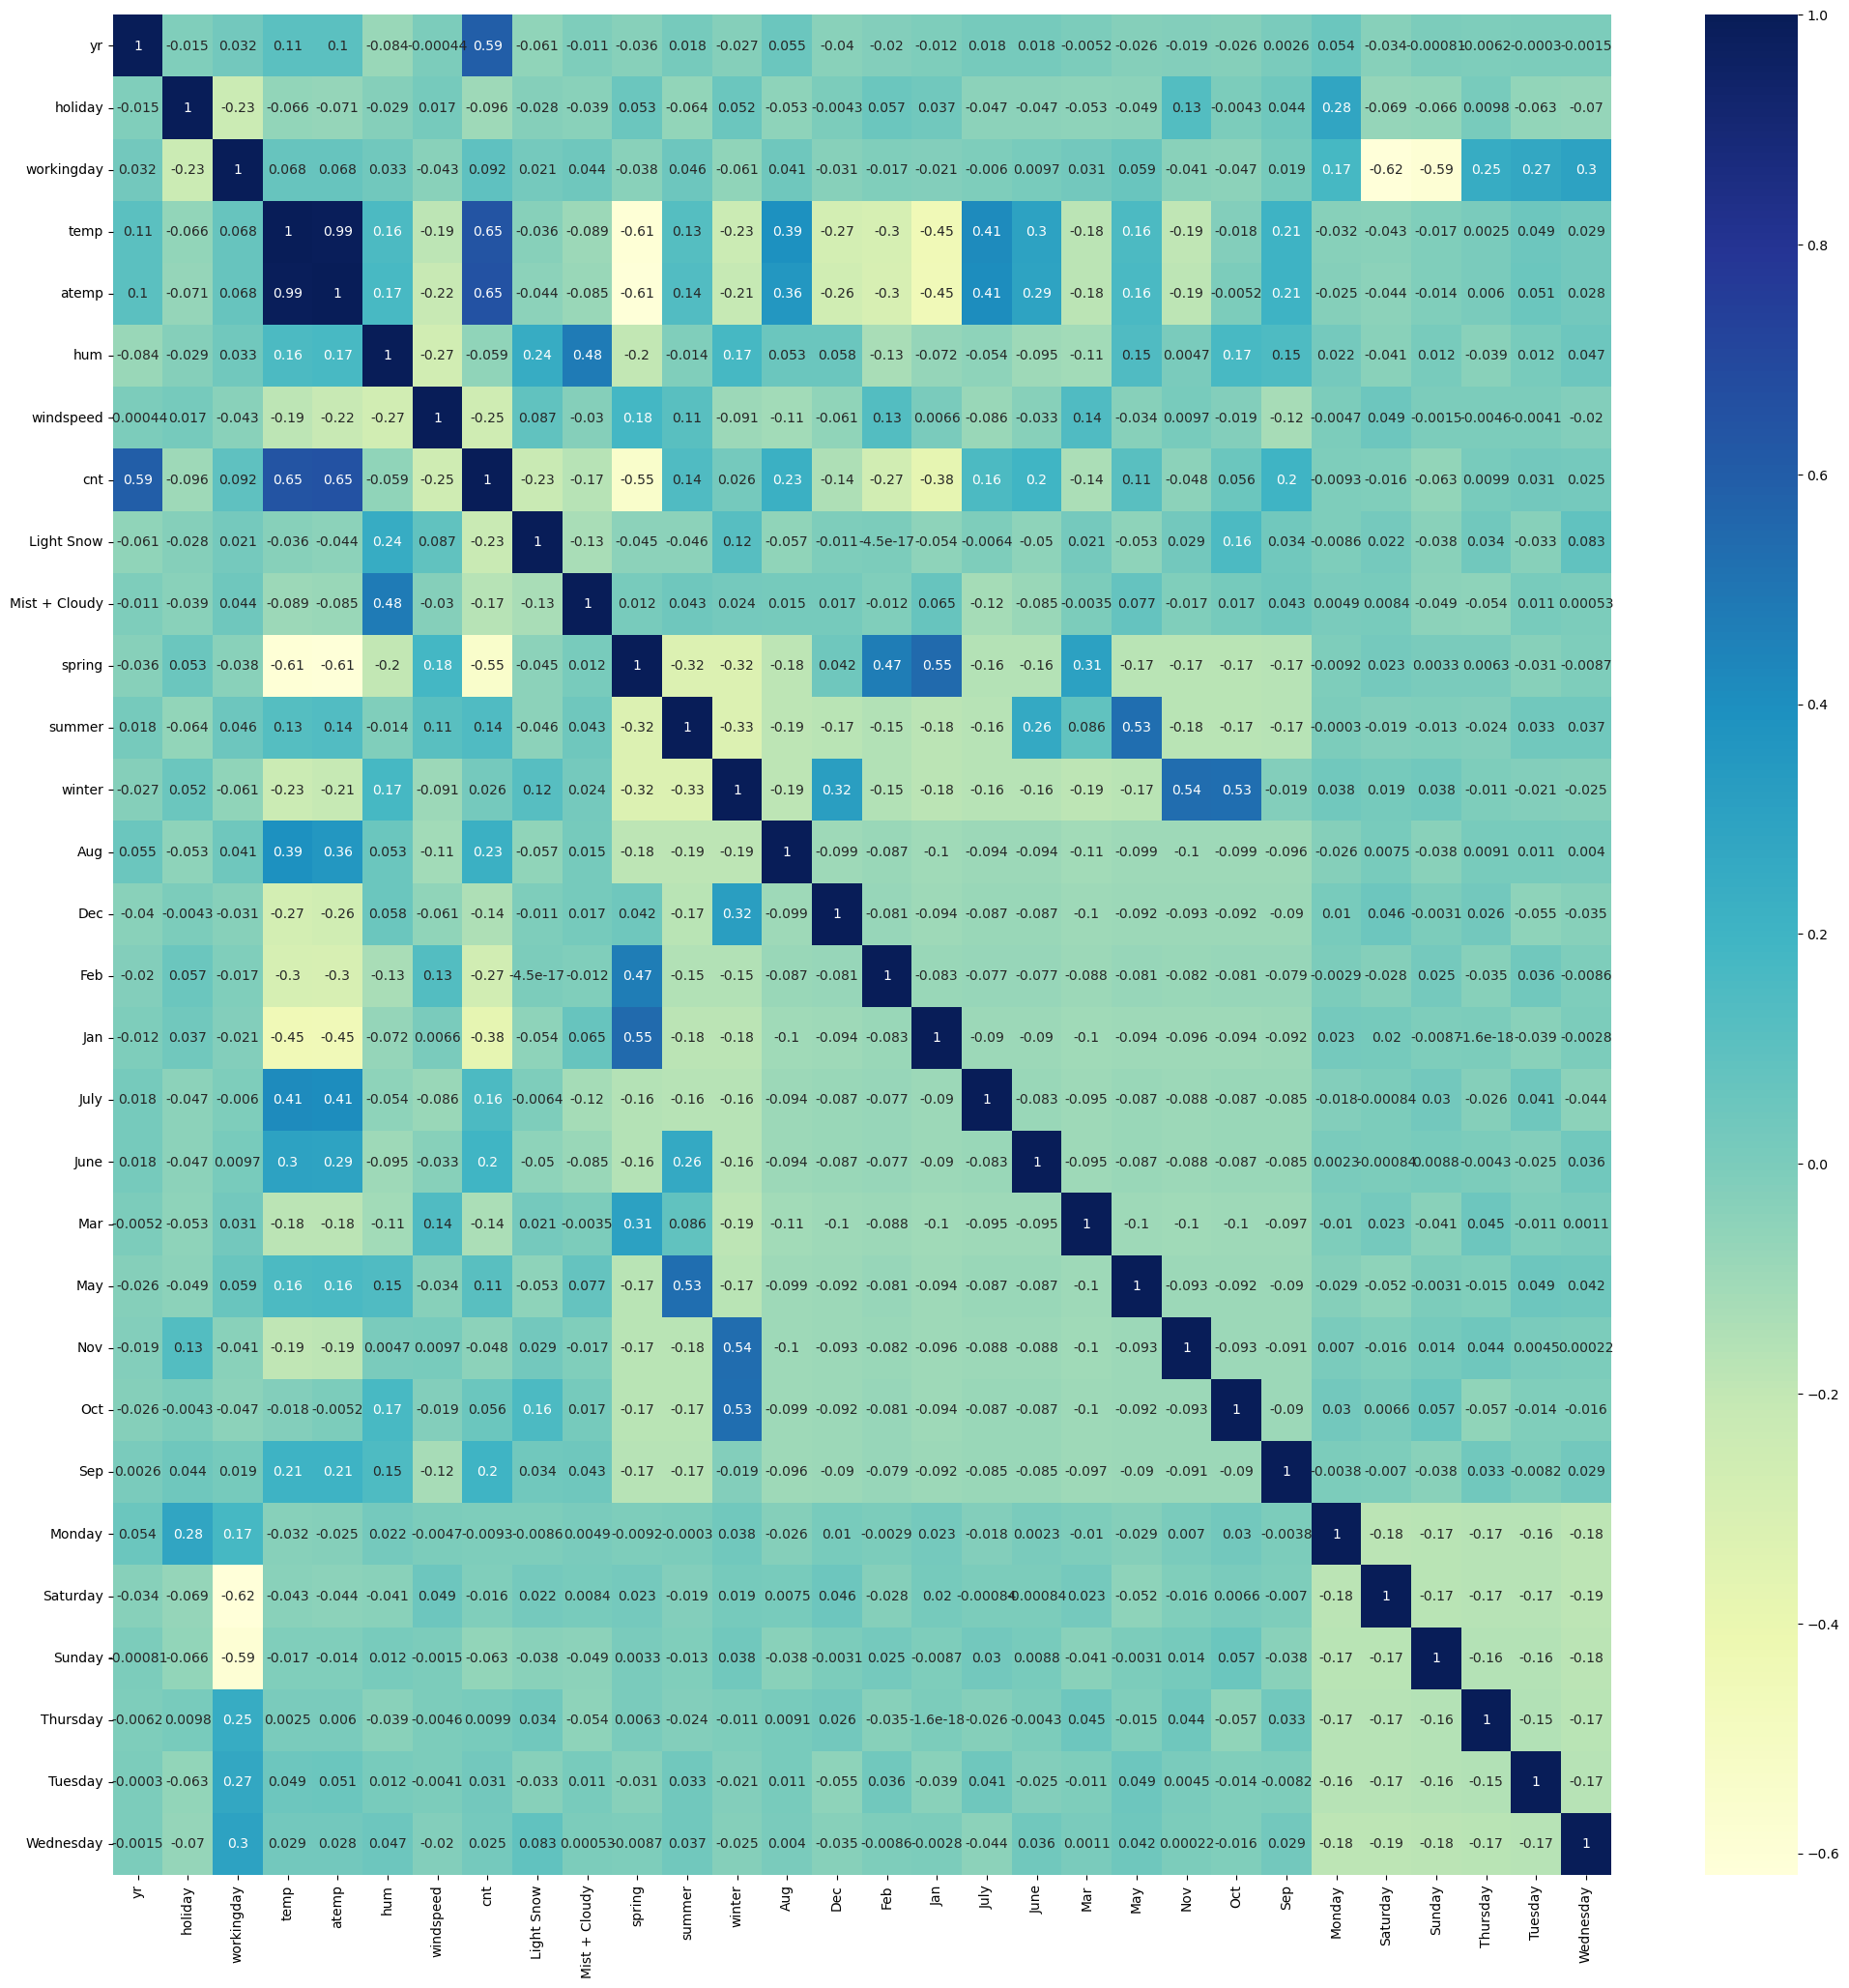

In [41]:
plt.figure(figsize= (25, 25))
sns.heatmap(df_train.corr(), annot= True, cmap='YlGnBu')
plt.show()

### Observation
-  May June July Sep Oct has a good correlation with count
-  temp has a good correlation with count
-  Summer season also has a good correlation with count
-  Yr has a good correlation with count

### Model building using RFE(Recurssive Feature Elimination)

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train


In [43]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)


In [44]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', False, 7),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 5),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('July', False, 14),
 ('June', False, 15),
 ('Mar', False, 11),
 ('May', False, 4),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13)]

In [45]:
X_train.columns[~rfe.support_]

Index(['atemp', 'spring', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May',
       'Nov', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
col = X_train.columns[rfe.support_]

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          8.70e-192
Time:                        17:31:13   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1640      0.022      7.507

In [49]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [50]:
#X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sat, 26 Aug 2023   Prob (F-statistic):          8.70e-192
Time:                        17:31:13   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2292      0.008     28.712

In [51]:
#Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [52]:
vif

,Features,VIF
2,workingday,31.45
13,Saturday,7.77
14,Sunday,7.65
1,holiday,2.14
4,hum,1.87
9,winter,1.71
3,temp,1.59
7,Mist + Cloudy,1.56
11,Oct,1.49
10,Aug,1.46


In [53]:
#We can drop few columns based on P value and VIF and coefficients.
X_train_new = X_train_rfe.drop(['holiday', 'const', 'hum', 'Oct', 'Aug', 'windspeed'], axis=1)
lm = sm.OLS(y_train, X_train_new).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1719.
Date:                Sat, 26 Aug 2023   Prob (F-statistic):                        0.00
Time:                        17:31:13   Log-Likelihood:                          481.17
No. Observations:                 510   AIC:                                     -942.3
Df Residuals:                     500   BIC:                                     -900.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [54]:
#Calculating VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [55]:
vif

,Features,VIF
2,temp,6.94
1,workingday,6.43
8,Saturday,2.14
9,Sunday,2.08
0,yr,2.04
4,Mist + Cloudy,1.58
5,summer,1.56
6,winter,1.51
7,Sep,1.20
3,Light Snow,1.07


### Residual Analysis of the train data


<Figure size 640x480 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

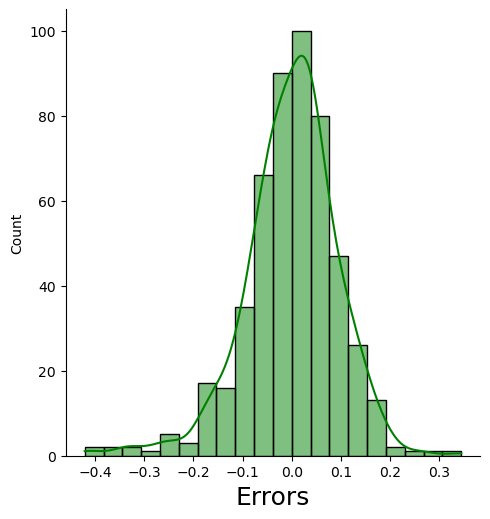

In [56]:
y_train_pred = lm.predict(X_train_new)
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.displot((y_train - y_train_pred),  bins = 20, kde = True, color= 'green')
fig.suptitle('Error Terms Distriibution', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Making Predictions
Applying the scaling on the test sets

In [57]:
numeric_vars = ['temp' , 'hum', 'windspeed', 'cnt']
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow,Mist + Cloudy,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.837241,33.27085,0.534223,0.149393,0.704300,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.911423,36.04875,0.470417,0.231142,0.725421,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.496221,22.85230,0.777843,0.443398,0.278853,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.890387,34.24915,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.821739,32.19710,0.070765,0.682387,0.569148,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow,Mist + Cloudy,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,24.250312,0.508362,0.418803,0.517923,0.027273,0.318182,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.248645,8.281075,0.200875,0.187683,0.239498,0.163248,0.466833,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.000000,4.941955,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,17.090025,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,24.700000,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,31.124313,0.650989,0.523975,0.687956,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,41.318550,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
X_test_rfe = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_rfe)

In [61]:
y_pred = lm.predict(X_test_rfe)

### Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

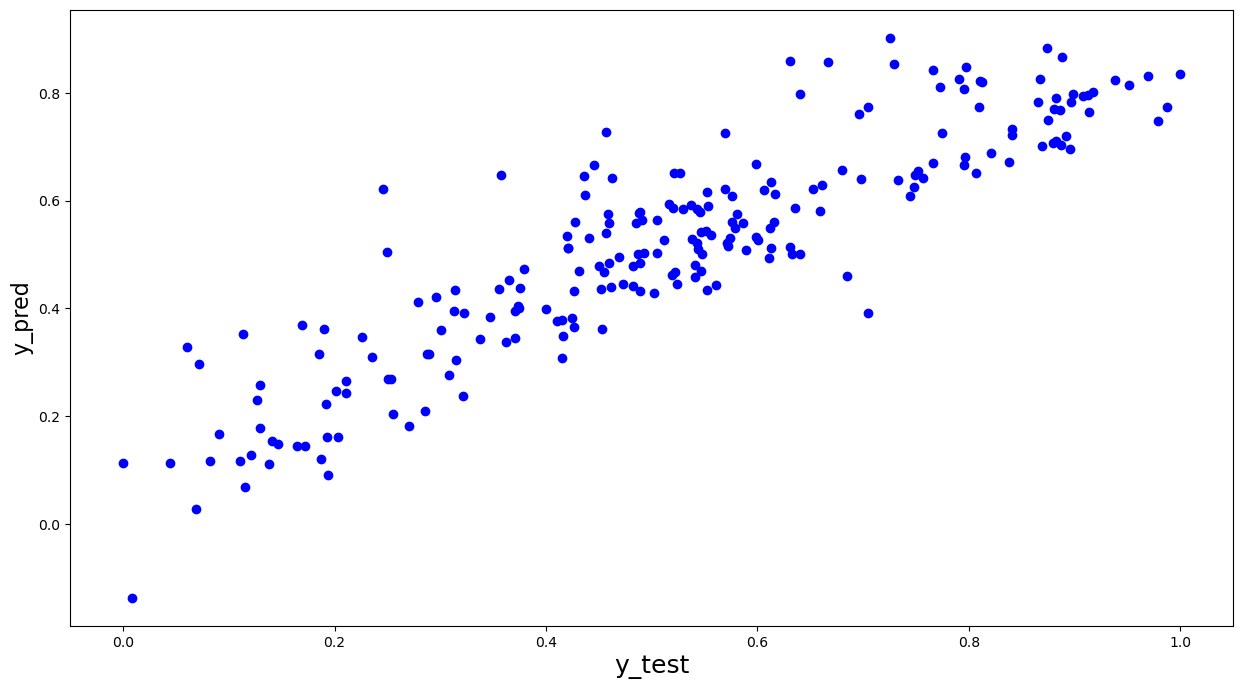

In [62]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)    
plt.xlabel('y_test', fontsize=18)                 
plt.ylabel('y_pred', fontsize=16)                 

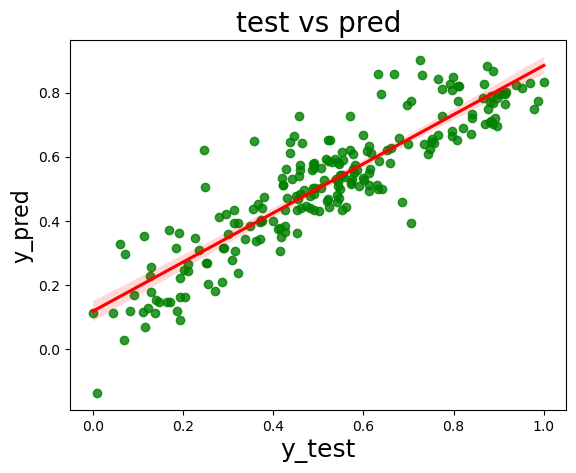

In [63]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "Green"}, line_kws={"color": "red"})

plt.title('test vs pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()


In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
 

0.7987829768450516

## Result
-  Season: \
Demand seems to be more in summer and fall. \
Demand seems to be less in spring season. \
-  Year: \
Demand was less in 2018 and increased in 2019. \
-  Month: \
Demand is high from June to October ie Summer. \
-  Weathersit: \
Demand is more when there is clear weather and when it is cloudy.